# Tutorial for ELApy 0.0.1

# Setup on google colab

In [1]:
## Mount Google Drive
import zipfile
import sys
import os
from os.path import join
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

# Please upload ELApy.zip from your local folder
uploaded = files.upload()

Mounted at /content/drive


Saving ELApy.zip to ELApy.zip


In [2]:
# install required packages from apt-get
! apt-get -y install libtool texinfo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libauthen-sasl-perl libclone-perl libdata-dump-perl libencode-locale-perl libfile-listing-perl
  libfont-afm-perl libhtml-form-perl libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl
  libhtml-tree-perl libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl libhttp-message-perl
  libhttp-negotiate-perl libio-html-perl libio-socket-ssl-perl liblwp-mediatypes-perl
  liblwp-protocol-https-perl libmailtools-perl libnet-http-perl libnet-smtp-ssl-perl
  libnet-ssleay-perl libtext-unidecode-perl libtry-tiny-perl liburi-perl libwww-perl
  libwww-robotrules-perl libxml-libxml-perl libxml-namespacesupport-perl libxml-parser-perl
  libxml-sax-base-perl libxml-sax-expat-perl libxml-sax-perl netbase perl-openssl-defaults
  tex-common
Suggested packages:
  libdigest-hmac-perl libgssapi-perl libcrypt-ssleay-perl libtool-doc gcj-jdk libsub

In [3]:
# First install required python packages
! pip install pybind11
! pip install pygam
! pip install --upgrade --no-deps pandas==2.2.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 80.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 88.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation:

In [ ]:
# restart session and reload pip settings
os.kill(os.getpid(), 9)

In [1]:
import numpy as np
import scipy
import pandas as pd

# Checking the version of all packages are compatible
print("numpy=="+np.__version__) # 1.26.4
print("pandas=="+pd.__version__) # 2.2.3
print("scipy=="+scipy.__version__) # 1.11.4

numpy==1.26.4
pandas==2.2.3
scipy==1.11.4


In [2]:
# load ELA package from local
! unzip "ELApy.zip"
%cd "ELApy"
! git clone "https://github.com/RUrlus/carma.git"
! mkdir "build"

Archive:  ELApy.zip
   creating: ELApy/
  inflating: __MACOSX/._ELApy        
  inflating: ELApy/ELAutility.py     
  inflating: ELApy/CMakeLists.txt    
  inflating: __MACOSX/ELApy/._CMakeLists.txt  
  inflating: ELApy/.DS_Store         
  inflating: __MACOSX/ELApy/._.DS_Store  
  inflating: ELApy/ELA.cpp           
  inflating: ELApy/ELA.py            
  inflating: ELApy/surfaceplot.py    
  inflating: __MACOSX/ELApy/._surfaceplot.py  
 extracting: ELApy/__init__.py       
  inflating: ELApy/Formatting.py     
  inflating: ELApy/visualization.py  
  inflating: __MACOSX/ELApy/._visualization.py  
  inflating: ELApy/StochOpt.cpp      
  inflating: ELApy/StochOptmain.py   
/content/ELApy
Cloning into 'carma'...
remote: Enumerating objects: 3627, done.
remote: Counting objects: 100% (1071/1071), done.
remote: Compressing objects: 100% (450/450), done.
remote: Total 3627 (delta 622), reused 773 (delta 594), pack-reused 2556 (from 1)
Receiving objects: 100% (3627/3627), 2.03 MiB | 4.91 MiB

In [8]:
! cd /usr/local/lib/python3.11/dist-packages/pybind11/share/cmake/pybind11 && ls

FindPythonLibsNew.cmake  pybind11ConfigVersion.cmake	     pybind11Targets.cmake
pybind11Common.cmake	 pybind11GuessPythonExtSuffix.cmake  pybind11Tools.cmake
pybind11Config.cmake	 pybind11NewTools.cmake


In [10]:
! echo $pybind11_DIR

/usr/local/lib/python3.11/dist-packages/ # this depends on the environment


In [11]:
## compile C++ modules

# add environmental path of pybind11
# The following is an example for python3.11 environment
%env pybind11_DIR=/usr/local/lib/python3.11/dist-packages/
!echo $pybind11_DIR

# run cmake
%cd /content/ELApy
! rm -rf build/ && mkdir build/
%cd build/
! cmake ..
! make

env: pybind11_DIR=/usr/local/lib/python3.11/dist-packages/
/usr/local/lib/python3.11/dist-packages/
/content/ELApy
/content/ELApy/build
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found Python: /usr/local/bin/python (found version "3.11.11") found components: Interpreter Development Development.Module Development.Embed
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- Found pybind11: /usr/local/lib/python3.11/dist-packages/pybind11/include (found version "2.13.6")
-- Found Armadillo: /usr/include (found version 

# run ELA

In [12]:
import sys

from ELApy import ELA
from ELApy.ELAutility import *
from ELApy.visualization import *
from ELApy.surfaceplot import *

import math as mt
import itertools as it
from os.path import join
import time
import matplotlib.pyplot as plt
import gc
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime as dt

In [23]:
! cd "/content/drive/MyDrive/Colab Notebooks/ela_data" && ls

abundance_table.csv  sample_metadata.csv


In [24]:
# load sample data
datadir = "/content/drive/MyDrive/Colab Notebooks/ela_data"
abdata = pd.read_csv(
    join(datadir,"abundance_table.csv"),index_col = 0)
metadata = pd.read_csv(
    join(datadir,"sample_metadata.csv"),index_col = 0)

# Simple SA case

In [25]:
# Simple example
ela = ELA.ELA(abdata, threads = 2, serials = 16)   # create ELA object and load rawdata
ela.Formatting_rawdata(SortSpecies=False) # formatting rawdata

/content/ELApy/ELA.py:208: UserWarning: No environmental factor data is specified, the program will run normalSA, otherwise you can set manually by ela.envdata = envmatrix <- (pandas.DataFrame)
  warnings.warn("No environmental factor data is specified, " + \


Processed 256 samples.
Relative abundance threshold = 0.05
Occurrence threshold (lower) = 0.05
Occurrence threshold (upper) = 0.95
Selected 16 out of 16 species.


In [27]:
# finding best parameter sets for fitting
all_results = ela.find_bestparams(fastfitting=True)
# best parameter
ela.best_params

Try: lambda=0.001000, we=0.001000, runadamW=True, Sparse=True
Try: lambda=0.100000, we=0.001000, runadamW=True, Sparse=True
Try: lambda=0.200000, we=0.001000, runadamW=True, Sparse=True
Try: lambda=0.250000, we=0.001000, runadamW=True, Sparse=True
Try: lambda=0.400000, we=0.001000, runadamW=True, Sparse=True


(0.25, 0.001, 1000)

(0.2, 0.4)

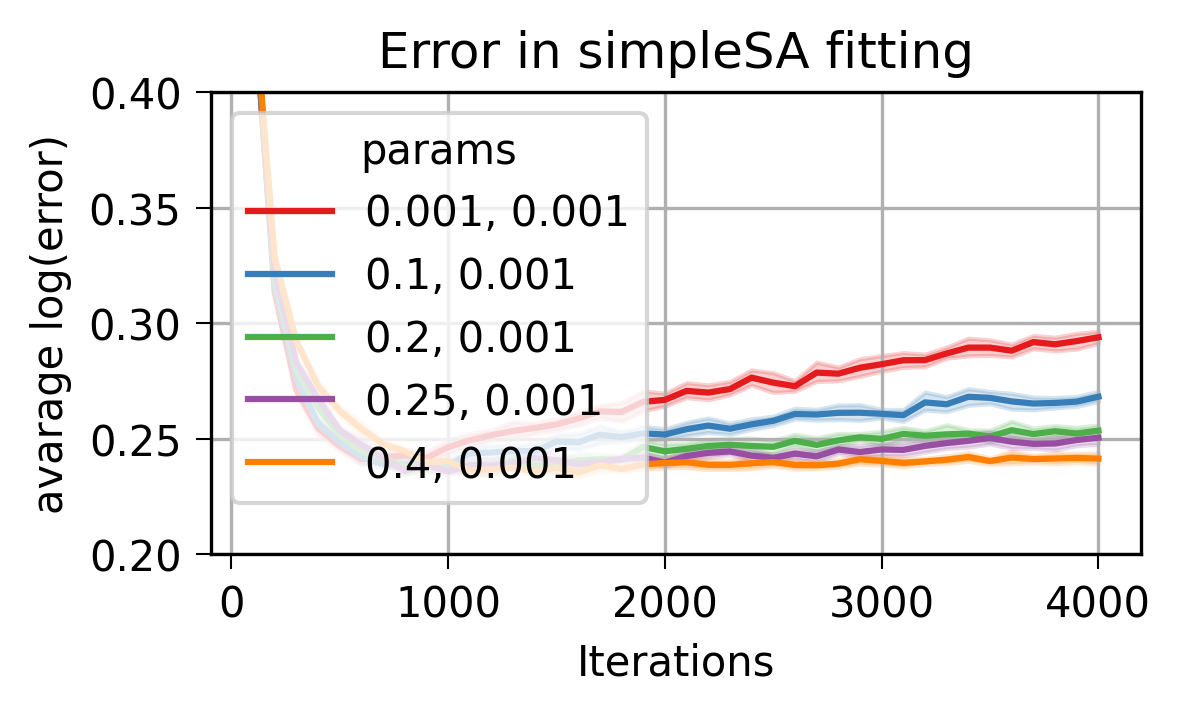

In [28]:
# Visualizing fitting result

fig = plt.figure(figsize=(4, 2),dpi=300)
ax = fig.add_subplot(1,1,1)

if "fitting_df" in locals():
    del fitting_df

for params in all_results.keys():
    # Plot
    res_serials_melt = all_results[params].melt()
    res_serials_melt["params"] = ", ".join([str(x) for x in params])

    color = list(np.random.rand(3)) + [0.7]
    if "fitting_df" in locals():
        fitting_df = pd.concat([fitting_df,res_serials_melt])
    else:
        fitting_df = res_serials_melt

ax = sns.lineplot(data=fitting_df,x="variable",y="value",hue="params",palette="Set1")
plt.title('Error in simpleSA fitting')
ax.set_xlabel('Iterations')
ax.set_ylabel('avarage log(error)')
ax.tick_params(width=0.5,labelsize=10)
plt.grid(True)
plt.ylim([0.2,0.4])

In [29]:
%%time
# running SA using best_params
ela.run_simpleSA(bestparams=True)

CPU times: user 40.9 ms, sys: 33.7 ms, total: 74.7 ms
Wall time: 1.12 s


In [38]:
# Then running ELA using the fitted parameter sets
ela.normalELA()
# Pruning stable states
ela.ELPruning(pss = 0.06)

[ELA]Basins searching finsihed...
[ELA]Total time:0.055073.3
[ELA]Tipping points searching finsihed...
[ELA]Total time:0.664733.3


In [39]:
ela.tipping_points

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,deltaE,ss1,ss2
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-10.621823,59852,46468
1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-10.621823,59852,38054
2,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-10.621823,59852,38092
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-10.353973,59852,52428
4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.978977,59852,58001
5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-11.008658,46468,38054
6,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-14.035540,46468,38092
7,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-10.398186,46468,52428
8,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-10.232529,46468,58001
9,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-11.008658,38054,38092


/content/ELApy/visualization.py:213: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xytext=(v[2] + 0.05, v[1] + 0.15),size=12, weight='bold')
/content/ELApy/visualization.py:217: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hgn1.annotate('C' + str(int(v[3])), xy=(v[2],v[1]),
/content/ELApy/visualization.py:218: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xytext=(v[2] + 0.05, v[1] + 0.15),size=12, weight='bold')
/content/ELApy/visu

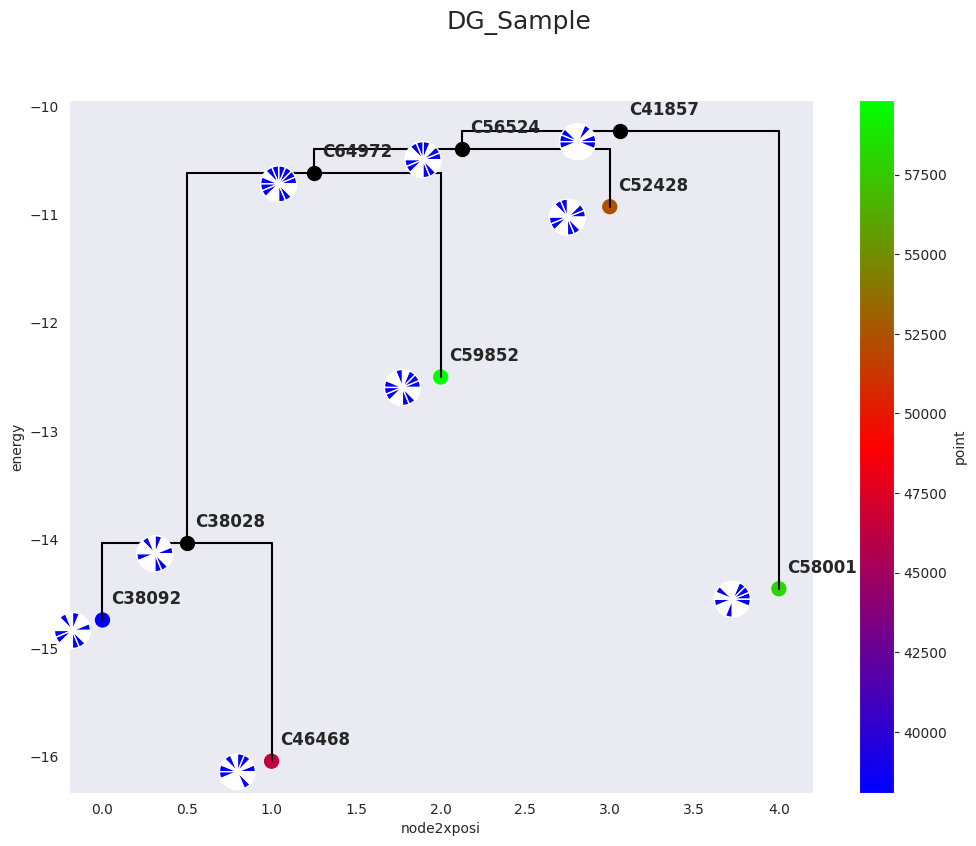

In [31]:
# Drawing disconnectivity graph

grobj = ela.get_GraphObj() # first get graph object

# Visualization
s = len(ela.ocmatrix.columns)
sns.set_style("dark")
DisconnectivityGraph(
    grobj, s, 'DG_Sample', filename = "DisconnectivityGraph.pdf",
    scale_adj = (0.55, 0.70), origin_adj = (0.75, 0.90))

Running NMDS...


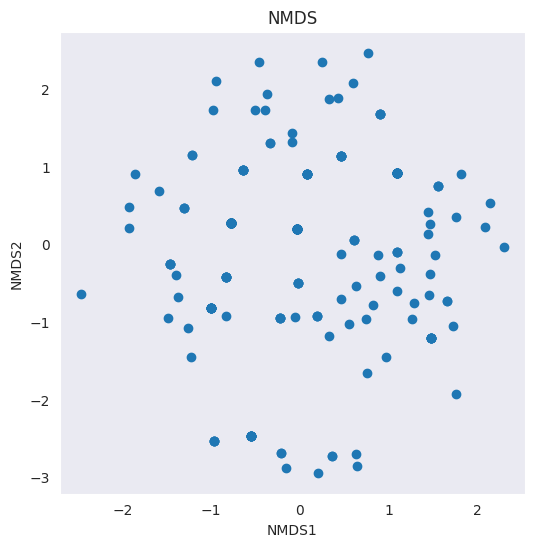

Processing 128 points...
0 points finished.
100 points finished.


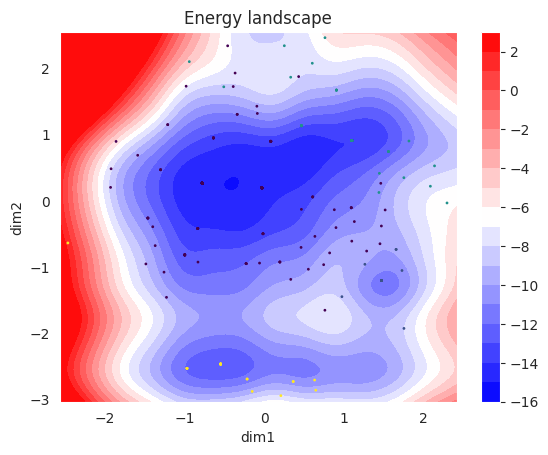

In [ ]:
# Visualizing results by 2d-surface plot
twodim_summary = ela.get_2d_summary()
NMDS_df, pred_Energy, mds_mesh = GAM_fitting(twodim_summary,fraction=0.5)
draw_contour_plot(NMDS_df, pred_Energy, mds_mesh, max_energy = 3, min_energy = -20)

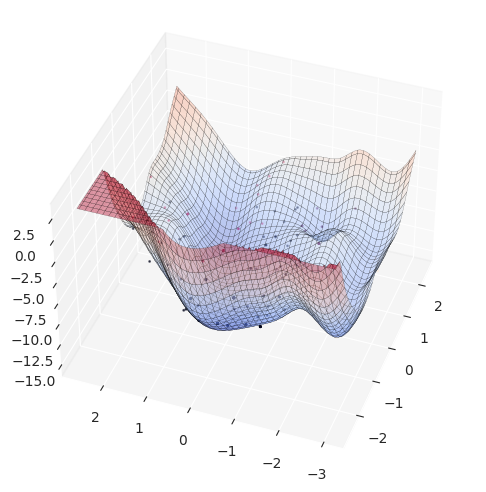

In [ ]:
draw_surface_plot(NMDS_df, pred_Energy, mds_mesh, elev = 40, azim = -160,
                  max_energy = 3, min_energy = -20)

/content/ELApy/visualization.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '40174' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  oc_summary_PCA.loc[i,"sstate"] = str(int(sstate_info[-1]))


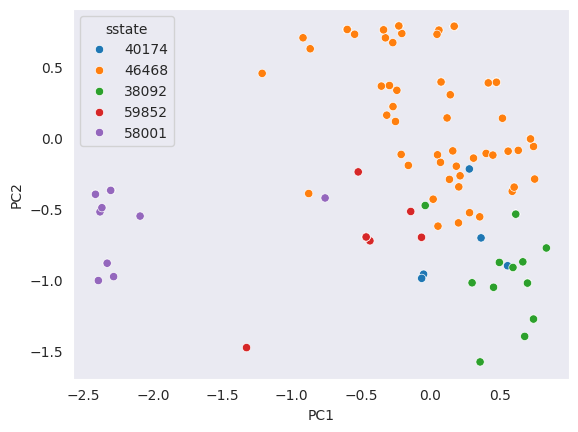

In [ ]:
# Draw PCA plot
ela.savedir = os.getcwd()
PCsummary = ela.draw_PCplot()

# Using plotly
### By using plotly package, we can draw the surface plot more interactively.

In [ ]:
! pip install plotly

In [ ]:
import plotly.graph_objects as go

# processing data
fig = go.Figure()
pred_Energy_plot = copy.copy(pred_Energy)
pred_Energy_plot[pred_Energy_plot > 0] = 5
fig.add_trace(go.Surface(x=mds_mesh[0], y=mds_mesh[1], z=pred_Energy_plot, colorscale="RdBu"))

sampled = NMDS_df.iloc[[np.random.randint(int(len(NMDS_df))) for x in range(int(len(NMDS_df)*1))]]

fig.add_trace(
    go.Scatter3d(
        x= sampled["dim1"],
        y= sampled["dim2"],
        z = sampled["Energy"],
        mode = 'markers',
        marker=dict(
        size=2,
        color=sampled["colors"], # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
        ),
        showlegend=False)
)
fig.update_layout(
    autosize=False, width=1000,
    height=1000,
)


fig.show()

# Full SA case (with explicit environmental factor matrix)

In [ ]:
# Simple example
fullela = ELA.ELA(abdata,metadata,threads = 16)   # create ELA object and load rawdata
fullela.Formatting_rawdata(SortSpecies=False,Rescale_env=True) # formatting rawdata

Processed 256 samples.
Relative abundance threshold = 0.05
Occurrence threshold (lower) = 0.05
Occurrence threshold (upper) = 0.95
Selected 16 out of 16 species.


In [ ]:
# set environmental parameter
fullela.set_envparams(fullela.envmatrix.median(),"factor.1",np.linspace(0,1,51))

In [ ]:
# finding best parameter sets for fitting
all_results = fullela.find_bestparams()
# best parameter
fullela.best_params

Try: lambda=0.001000, we=0.001000, runadamW=True, Sparse=True
Try: lambda=0.100000, we=0.001000, runadamW=True, Sparse=True
Try: lambda=0.200000, we=0.001000, runadamW=True, Sparse=True
Try: lambda=0.250000, we=0.001000, runadamW=True, Sparse=True
Try: lambda=0.400000, we=0.001000, runadamW=True, Sparse=True


(0.25, 0.001, 1100)

In [ ]:
fullela.run_fullSA(bestparams=True)

In [ ]:
fullela.gradELA(pss = 0.1)

/content/ELApy/ELA.py:583: UserWarning:

The length of stable states matrix is less than 2. Pruning is skipped...

/content/ELApy/ELA.py:583: UserWarning:

The length of stable states matrix is less than 2. Pruning is skipped...

/content/ELApy/ELA.py:583: UserWarning:

The length of stable states matrix is less than 2. Pruning is skipped...

/content/ELApy/ELA.py:583: UserWarning:

The length of stable states matrix is less than 2. Pruning is skipped...



<Axes: xlabel='factor.1', ylabel='energy'>

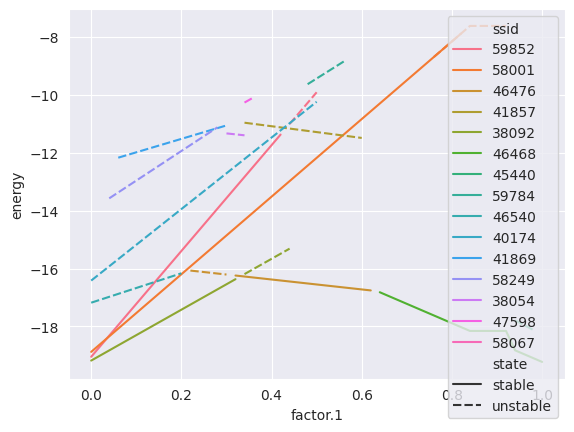

In [ ]:
# Drawing
gradELA_df = fullela.get_gradELA_diagram()

sns.set_style("darkgrid")
sns.lineplot(data=gradELA_df, x="factor.1", y="energy", hue="ssid",
             style= "state")